# Lorenz attractor
[Lorenz attractor](https://en.wikipedia.org/wiki/Lorenz_system) with initial conditions and 3D plot
Originally shown on the SciPython Blog by Christian

In [1]:
import numpy as np
from scipy.integrate import odeint #solve a system of ordinary differential equation

Add the parameters and constants for the convection equations

In [2]:
# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

Define a function to compute the Lorenz convection equations

In [3]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

Integrate the equations for all timepoints

In [4]:
# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

Plot the results in 3D and using colour

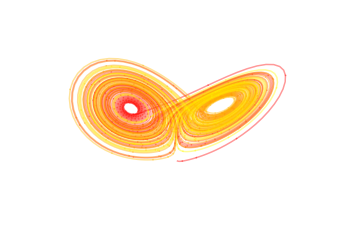

In [5]:
# Plot the Lorenz attractor using a Matplotlib 3D projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()